In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=3
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, let's break down the provided Hamiltonian to understand the system we're dealing with, and then build the appropriate `HartreeFockHamiltonian` class.

First, let me analyze the Hamiltonian equation:

$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k)  c_s(k)$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

The system is on a triangular lattice. The hopping parameters are: 
- t_1 = 6 meV for nearest-neighbor hopping
- t_2 = 1 meV for next-nearest-neighbor hopping

The interactions considered are on-site (U_0) and nearest neighbor (U_1).

Let's start by answering the questions:

### QUESTION 1: Dimensi

In [7]:
print(generated_code['thinking'])

Alright, let's break down the provided Hamiltonian to understand the system we're dealing with, and then build the appropriate `HartreeFockHamiltonian` class.

First, let me analyze the Hamiltonian equation:

$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k)  c_s(k)$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

The system is on a triangular lattice. The hopping parameters are: 
- t_1 = 6 meV for nearest-neighbor hopping
- t_2 = 1 meV for next-nearest-neighbor hopping

The interactions considered are on-site (U_0) and nearest neighbor (U_1).

Let's start by answering the questions:

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I not

In [8]:
print(generated_code['text'])

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
   "⟨c_s^†(k1) c_s(k1)⟩": "exp_val[s, s, k1]",
   "⟨c_s^†(k1) c_s′(k1)⟩": "exp_val[s, s_prime, k1]"
}

TERMS:
- E_s(k) c_s^†(k) c_s(k) -> H[s, s, k], NI
- (1/N) U(0) ⟨c_s^†(k1) c_s(k1)⟩ c_s′^†(k2) c_s′(k2) -> H[s_prime, s_prime, k2], I
- -(1/N) U(k1-k2) ⟨c_s^†(k1) c_s′(k1)⟩ c_s′^†(k2) c_s(k2) -> H[s_prime, s, k2], I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system on a triangular lattice with spin.
    
    The Hamiltonian consists of:
    1. Kinetic term with nearest-neighbor and next-nearest-neighbor hopping
    2. Hartree term with on-site interaction
    3. Fock term with on-site and nearest-neighbor interactions
    
    Args:
        N_shell (int): Number of shells in k-space for Brillouin zone sampling
        parameters (dict): Dictionary of model parameters
        fill

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system on a triangular lattice with spin.
    
    The Hamiltonian consists of:
    1. Kinetic term with nearest-neighbor and next-nearest-neighbor hopping
    2. Hartree term with on-site interaction
    3. Fock term with on-site and nearest-neighbor interactions
    
    Args:
        N_shell (int): Number of shells in k-space for Brillouin zone sampling
        parameters (dict): Dictionary of model parameters
        filling_factor (float): Filling factor, default is 0.5
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t1': 6.0, 't2': 1.0, 'U0': 1.0, 'U1': 0.5, 'T': 0.0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Two spin states (up and down)
        self.basis_order = {'0': 'spin'}
        
        # Occupancy relevant parameters
        self.nu = filling_factor
       

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_3.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

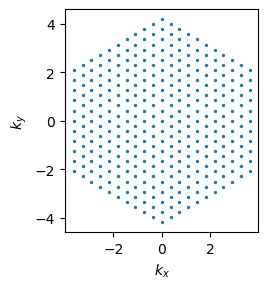

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

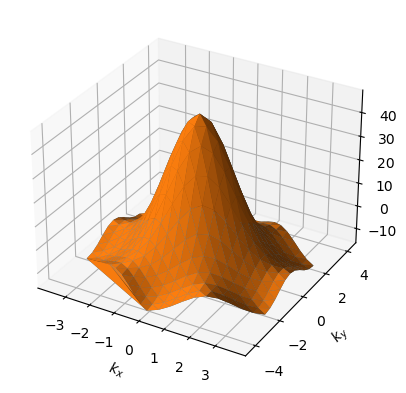

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

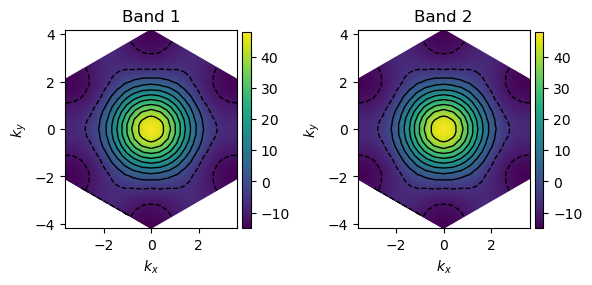

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


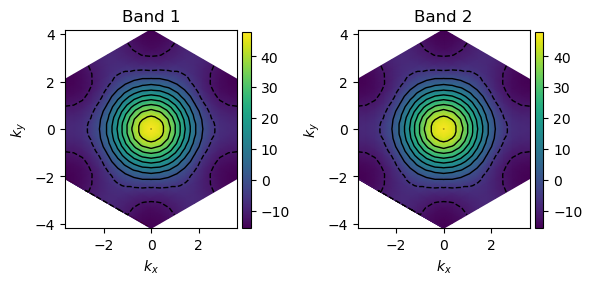

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


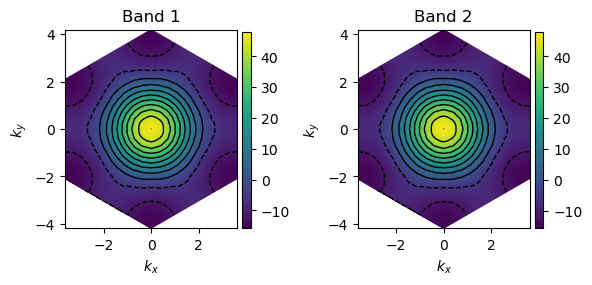

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is -63.79
U/T is 0.04
mean_U is 0.25


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to evaluate the image provided against the rubric for a numerical calculation involving a Hartree-Fock method for a Hamiltonian on a triangular lattice. Let me analyze step by step.

The image shows a hexagonal pattern of points in k-space (momentum space), with the x-axis labeled as k_x and the y-axis labeled as k_y. The hexagonal pattern extends from approximately -4 to 4 on the k_y axis and -3 to 3 on the k_x axis.

Let's check against the rubric:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."
   - The image indeed shows a mesh of points in momentum space.
   - For a triangular lattice, the first Brillouin zone is a hexagon, which is what we see in the image.
   - The mesh appears to be uniform and covers the entire hexagonal region.

2. "You need to check the point group symmetry."
   - The triangular lattice has a 6-fold rotational symmetry (D6h point group).
   - Lo

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image provided, which shows two band structure plots for what appears to be a triangular lattice system, according to the given Hamiltonian and problem statement.

The image shows two panels labeled "Band 1" and "Band 2", each displaying a false color plot with contour lines in the first Brillouin zone. I need to evaluate these plots according to the provided rubric.

Let's go through the rubric systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, the Brillouin zone boundary appears to be a hexagon. This is indeed the expected shape for a triangular lattice in real space - the reciprocal lattice of a triangular lattice forms a hexagonal Brillouin zone. So this matches what we would expect.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest en

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image showing band structure from a Hartree-Fock calculation on a triangular lattice. I need to follow the rubric step by step:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that both band plots are shown within hexagonal boundaries. This is indeed the correct Brillouin zone shape for a triangular lattice, as a triangular lattice in real space corresponds to a hexagonal Brillouin zone in reciprocal space. So this part appears correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
The highest energy regions (yellow) appear to be at the center of both plots, at the Γ point (k_x = 0, k_y = 0).

2.2 Trace the pattern of energy variation across the zone
The energy decreases as we move outward from the center in a cir

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me analyze the image carefully according to the rubric to determine if it meets the requirements for an interacting-renormalized band structure calculation using the Hartree-Fock method for a triangular lattice.

1. First, identify the shape of the Brillouin zone boundary:
   - Looking at the image, I can see that the boundary forms a hexagon, which is indeed the expected Brillouin zone shape for a triangular lattice. This is correct.

2. Examining the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow):
       - The highest energy regions (yellow) appear at the center of both Band 1 and Band 2, around (kx=0, ky=0).
   
   2.2 Pattern of energy variation:
       - The energy decreases radially outward from the center in concentric circles/contours.
       - The pattern shows circular symmetry with the energy decreasing from the center toward the zone boundary.
   
   2.3 Rotational and mirror symmetries:
 

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '3' saved to final_answer.yaml
